### Projet TSP

In [7]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [41]:
class SolverTSP:
    def __init__(self, position):
        self.position = position
        self.distance = cdist(position,position)
    
    def Cost(self):
        Total_cost = np.sum(self.Solve()[1])
        return(Total_cost)
    
    def Solve(self):
        # permutation optimale
        actuel = 0
        ppv = [actuel] # prochain point de vente
        cout = []
        for i in range(0,nbville-1):
            selection = min(np.delete(self.distance[ppv[-1]],ppv))
            cout.append(selection)
            ppv.append(np.where(self.distance[ppv[-1]] == selection)[0][0])
        
        return(ppv , cout)
    
    def dessine_tour(self):
        permutations = self.Solve()[0]
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        ax.plot(self.position[permutations, 0], self.position[permutations, 1], 'b-o') #trâce tous les (x, y) dans l'ordre des permutations
        ax.plot([self.position[permutations[0], 0], self.position[permutations[-1], 0]],
                [self.position[permutations[0], 1], self.position[permutations[-1], 1]], 'b-o') # ajoute la ligne entre la 1ère et dernière ligne
        for i, txt in enumerate(range(0, len(self.position))):
            ax.annotate(txt, (self.position[permutations[i], 0], self.position[permutations[i], 1]), textcoords="offset points", xytext=(0, 10), ha='center')
        return (ax)

### Now we test our solution : 

[[0.01019806 0.21974419]
 [0.09199778 0.15994461]
 [0.1755594  0.35095287]
 [0.5437653  0.7841765 ]
 [0.65151418 0.45234541]]


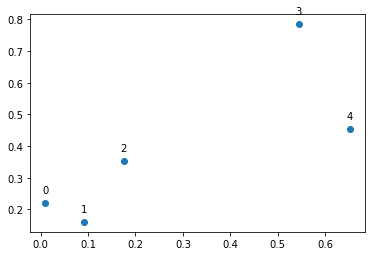

In [8]:
nbville = 5
position = np.random.uniform(0, 1, size=(nbville,2))
print(position)

plt.plot(position[:, 0], position[:, 1], 'o')
for i, txt in enumerate(range(0, nbville)):
    plt.annotate(txt, (position[i, 0], position[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

The matrix of distances is : [[0.         0.10132712 0.21109261 0.77670962 0.68219476]
 [0.10132712 0.         0.2084867  0.77055781 0.63131357]
 [0.21109261 0.2084867  0.         0.56855808 0.48663477]
 [0.77670962 0.77055781 0.56855808 0.         0.34888636]
 [0.68219476 0.63131357 0.48663477 0.34888636 0.        ]] 

The cities to visit are : [[0.01019806 0.21974419]
 [0.09199778 0.15994461]
 [0.1755594  0.35095287]
 [0.5437653  0.7841765 ]
 [0.65151418 0.45234541]] 

The sequence of the traveled cities is : [0, 1, 2, 4, 3] 

The total distance traveled is 1.145334936969267

The drawing of the route is as follows : AxesSubplot(0.125,0.125;0.775x0.755) 



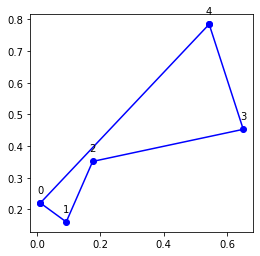

In [54]:
x = SolverTSP(position)

print(f'The matrix of distances is : {x.distance} \n')

print(f'The cities to visit are : {x.position} \n')

perm = x.Solve()[0]
print(f'The sequence of the traveled cities is : {perm} \n')

cout = x.Cost()
print(f'The total distance traveled is {cout}\n')

draw = x.dessine_tour()
print(f'The drawing of the route is as follows {draw} \n')